In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day9_9_07_2025\Indian Kids Screen Time 2025\Indian_Kids_Screen_Time.csv')

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [5]:
df1 = df.drop(['Health_Impacts'], axis = 'columns', inplace = True)

In [6]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,Urban
1,11,Female,4.61,Laptop,True,0.30,Urban
2,18,Female,3.73,TV,True,0.32,Urban
3,15,Female,1.21,Laptop,False,0.39,Urban
4,12,Female,5.89,Smartphone,True,0.49,Urban


In [7]:
col_to_encode = ['Gender', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Urban_or_Rural']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_to_encode:
    df[col] = le.fit_transform(df[col])
    df.head()

In [9]:
X = df.drop('Urban_or_Rural', axis = 'columns')

In [10]:
X.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
0,14,1,3.99,1,1,0.42
1,11,0,4.61,0,1,0.30
2,18,0,3.73,2,1,0.32
3,15,0,1.21,0,0,0.39
4,12,0,5.89,1,1,0.49


In [11]:
y = df['Urban_or_Rural']

In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Urban_or_Rural, dtype: int64

In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 32)

In [15]:
rfclf = RandomForestClassifier()

In [16]:
scores = cross_val_score(rfclf, X, y, cv=kf)

In [17]:
print(scores)

[0.64796706 0.62274833 0.61585994 0.63594233 0.64572606]


In [18]:
scores.mean()

np.float64(0.6336487419785196)

In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 44)

In [21]:
skf_scores = cross_val_score(rfclf, X, y, cv=kf)

In [22]:
print(skf_scores)

[0.64179104 0.62120432 0.61585994 0.64160659 0.63491246]


In [23]:
skf_scores.mean()

np.float64(0.6310748717437706)

In [24]:
#from sklearn.model_selection import LeaveOneOut
#loo = LeaveOneOut()
#scores = cross_val_score(rfclf, X, y, cv=loo)

In [25]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd4aa97d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd4aad8050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd4a9afc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd4aad82d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd4aad8410>],
 'means': []}

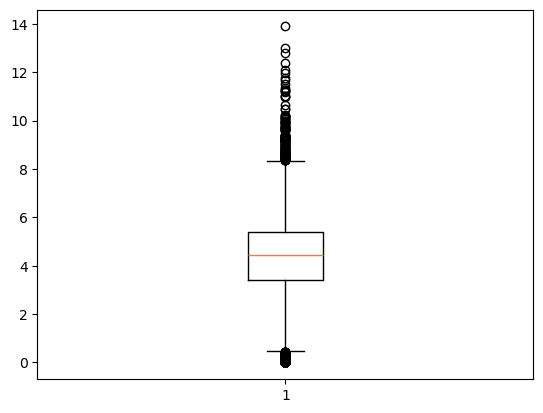

In [26]:
plt.boxplot(df['Avg_Daily_Screen_Time_hr'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd4ab61f90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd4ab62210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd4ab61e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd4ab62490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd4ab625d0>],
 'means': []}

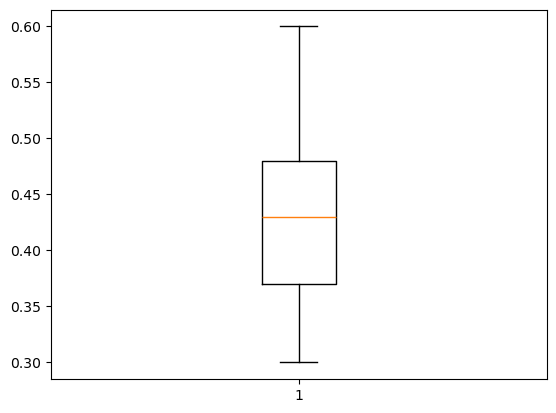

In [27]:
plt.boxplot(df['Educational_to_Recreational_Ratio'])

In [35]:
col = 'Avg_Daily_Screen_Time_hr'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)

In [36]:
IQR = q3 - q1

In [37]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [38]:
df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [40]:
df_filtered.shape

(9264, 7)

In [41]:
df.shape

(9712, 7)

In [43]:
df.shape[0] - df_filtered.shape[0]

448

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd4c1ebb10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd4c1ebd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd4c1eb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd4c204050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd4c204190>],
 'means': []}

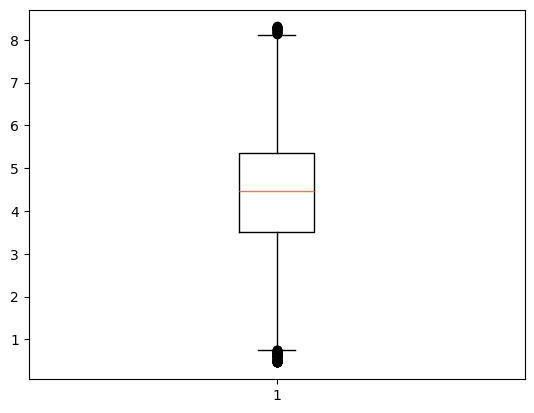

In [42]:
plt.boxplot(df_filtered[col])

In [44]:
df_filtered.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Urban_or_Rural
0,14,1,3.99,1,1,0.42,1
1,11,0,4.61,0,1,0.30,1
2,18,0,3.73,2,1,0.32,1
3,15,0,1.21,0,0,0.39,1
4,12,0,5.89,1,1,0.49,1


In [47]:
A = df_filtered.drop('Urban_or_Rural', axis = 'columns')

In [48]:
b = df_filtered['Urban_or_Rural']

In [49]:
scores = cross_val_score(rfclf, A, b, cv = kf)

In [51]:
scores.mean()

np.float64(0.637628141394668)